### Import Pandas and Numpy

In [1]:
import pandas as pd
import numpy as np

### Read the data

In [2]:
df = pd.read_csv('tennis.csv')

In [3]:
df.head()

tourney_id tourney_name surface  draw_size tourney_level  tourney_date  \
0  2019-M020     Brisbane    Hard        NaN             A      20181231   
1  2019-M020     Brisbane    Hard        NaN             A      20181231   
2  2019-M020     Brisbane    Hard        NaN             A      20181231   
3  2019-M020     Brisbane    Hard        NaN             A      20181231   
4  2019-M020     Brisbane    Hard        NaN             A      20181231   

   match_num  winner_id  winner_seed winner_entry  ... l_1stIn l_1stWon  \
0        243     106034          NaN          NaN  ...    37.0     28.0   
1        244     117360          NaN          NaN  ...    65.0     49.0   
2        245     106423          NaN          NaN  ...    44.0     31.0   
3        246     106426          3.0          NaN  ...    33.0     28.0   
4        247     200175          7.0          NaN  ...    21.0     12.0   

   l_2ndWon l_SvGms  l_bpSaved  l_bpFaced  winner_rank winner_rank_points  \
0      14.0    11.0        5.0        8.0        185.0              275.0   
1      23.0    16.0        4.0        7.0        166.0              318.0   
2       7.0     9.0        5.0        7.0        146.0              367.0   
3       9.0    10.0        2.0        4.0         84.0              650.0   
4       7.0     7.0        3.0        8.0        131.0              433.0   

  loser_rank loser_rank_points  
0      136.0             421.0  
1       99.0             590.0  
2      119.0             482.0  
3        NaN               NaN  
4      297.0             125.0  

[5 rows x 49 columns]

### Drop the records where the winner_hand or loser_hand column has 'U' in them

In [5]:
df.drop(df[df.winner_hand == 'U'].index, axis = 0, inplace = True)
df.drop(df[df.loser_hand == 'U'].index, axis = 0, inplace = True)

In [6]:
dff = df.loc[:,['winner_hand', 'loser_hand']]

In [7]:
dff.head(10)

winner_hand loser_hand
0            R          R
2            R          R
4            R          R
5            R          L
7            R          L
9            R          R
10           R          R
11           L          R
12           R          R
14           R          R

### Create a dataframe containing records where the oponents had different dominant hands

In [8]:
a = dff['winner_hand'] == 'R'   # a boolean array to find the instances that tells if the winners were right
b = dff['loser_hand']  == 'L'   # a boolean array to find the instances that tells is the losers were left handed
c = a == b    # a boolean array which tells if the oponents have different dominant hand
d = dff[c]

In [9]:
d['success'] = d['winner_hand'].replace({'R' : 'success' , 'L' : 'Failure'})


/home/prithviraj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
d.head()

winner_hand loser_hand  success
5            R          L  success
7            R          L  success
11           L          R  Failure
23           L          R  Failure
25           L          R  Failure

### Create a crosstab between the winner_hand and loser_hand columns

In [11]:
ctab = pd.DataFrame({'Right' : [sum(df.winner_hand == 'R'), sum(df.loser_hand == 'R')],
                     'Left' : [sum(df.winner_hand == 'L'), sum(df.loser_hand == 'L')]}, index = ['winners', 'losers'])

In [34]:
ctab

Right  Left
winners    774   133
losers     784   122

In [12]:
ctab.sum()

Right    1558
Left      255
dtype: int64

### Calculate probability of winning given the player is right handed

p(w|R) = P(w and R)/P(R)   

In [14]:
p =  (ctab.iloc[0,0]/ctab.sum().sum())/(ctab.sum()[0]/ctab.sum().sum())

In [15]:
d.shape

(229, 3)

### Get the binomial distribution, for a wide range of number of successes - 'k'  ( you can consider the total number of records)

In [16]:
import scipy.stats as stats
import matplotlib.pyplot as plt

k = np.arange(0,229, 1)
k.sort()
n = 229
binomial = stats.binom.pmf(k,n,p)


Text(0, 0.5, 'Probability of Successes')

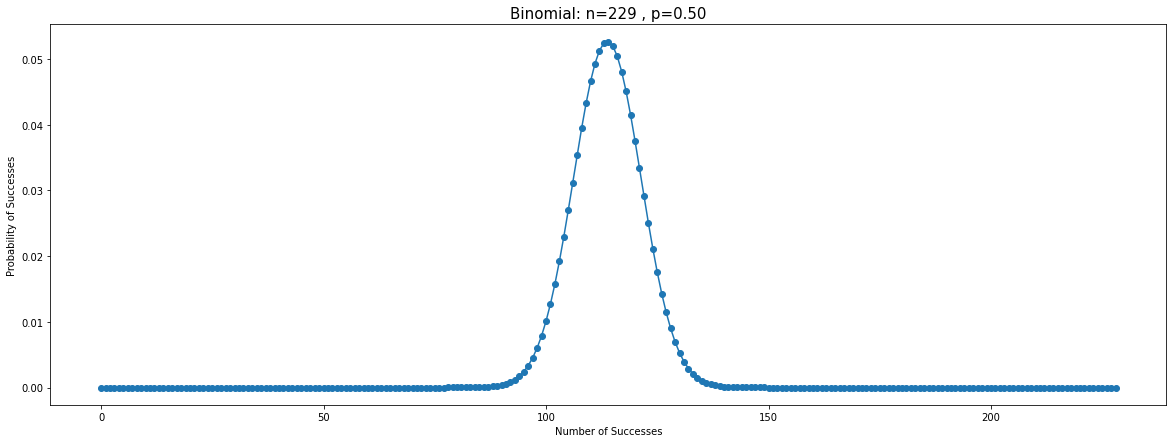

In [17]:
plt.figure(figsize=(20,7))
plt.plot(k,binomial,'o-')
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of Successes')
plt.ylabel('Probability of Successes')


* The plot above plot is the probability distribution of number of Successes (Success - the winner was a right handed player)
* The matches are independant experiments (or trials) and the right handed player winning is our outcome of interest - call it success